For the ensemble learning, this resource was very useful: https://www.kaggle.com/code/satishgunjal/ensemble-learning-bagging-boosting-stacking/notebook


Solution heavily influenced by these resources: https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
It worked as a template on which steps to follow  



In [36]:
import pandas as pd
import numpy as np
import warnings

# Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

In [37]:
abalone_df = pd.read_csv('abalone.csv')

*****************************************************************************************************

# EXPLORATORY DATA ANALYSIS

*****************************************************************************************************

In [38]:
abalone_df.shape

(4177, 9)

In [39]:
abalone_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [40]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [41]:
abalone_df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [42]:
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [43]:
def abalone_sex(x):
  if x['Sex'] == 'M': 
    return 1
  elif x['Sex'] == 'F':
    return 2
  else:
    return 3
    
abalone_df['Sex'] = abalone_df.apply(abalone_sex, axis=1)

In [44]:
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [45]:
abalone_df2 = abalone_df.rename({'Whole weight': 'Whole_weight', 'Shucked weight': 'Shucked_weight', 'Viscera weight': 'Viscera_weight', 'Shell weight': 'Shell_weight'}, axis=1)  # new method

In [46]:
abalone_df2

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [47]:
abalone_df2[['Rings']].describe()

,Rings
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


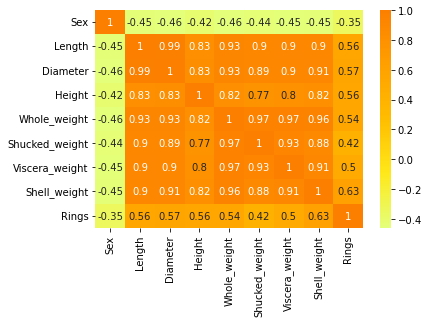

In [48]:
# correlation plot
corr = abalone_df2.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

Text(0.5, 1.0, 'Scatter plot of Rings vs Diameter')

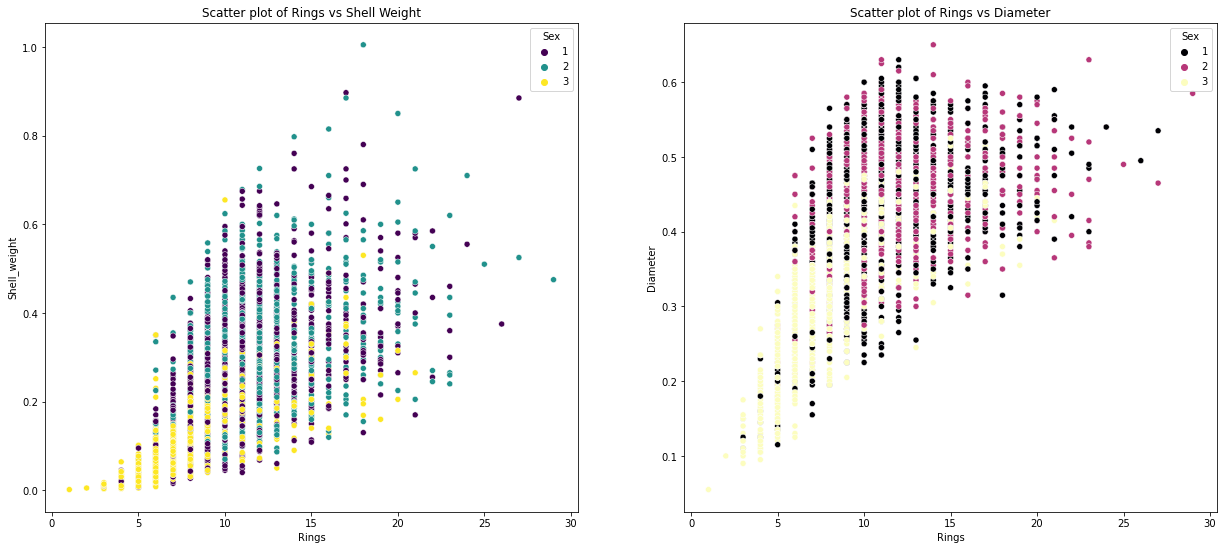

In [49]:
f = plt.figure(figsize=(21,9))

ax = f.add_subplot(121)
sns.scatterplot(x='Rings',y='Shell_weight',data=abalone_df2,palette='viridis',hue='Sex')
ax.set_title('Scatter plot of Rings vs Shell Weight')
plt.savefig('sc.png');

ax = f.add_subplot(122)
sns.scatterplot(x= 'Rings',y='Diameter',data=abalone_df2,palette='magma',hue='Sex',ax=ax)
ax.set_title('Scatter plot of Rings vs Diameter')

In [50]:
from sklearn.model_selection import train_test_split
X = abalone_df2.drop('Rings',axis=1) # Independet variable
y = abalone_df2['Rings'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


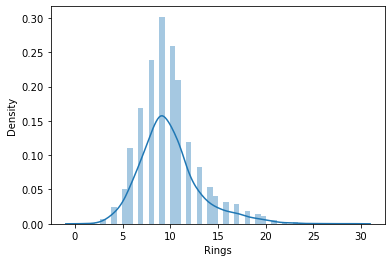

In [51]:
#normality check for the target
ax = sns.distplot(y_train)
plt.show()

*****************************************************************************************************

# ENSEMBLE LEARNING

*****************************************************************************************************

In [52]:
models_scores = [] # To store model scores

def rmse(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return mean_squared_error(y_test, y_pred, squared= False) # squared= False > returns Root Mean Square Error  

Linear Regression

In [53]:
linear_regression = make_pipeline(LinearRegression())
score = rmse(linear_regression)

models_scores.append(['LinearRegression', score])
print(f'LinearRegression Score= {score}')

LinearRegression Score= 2.258912186417445


Lasso REgression

In [54]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state= 23))

score = rmse(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

Lasso Score= 2.2588977277262705


ElasticNet Regression

In [55]:
elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio= .9, random_state= 23))

score = rmse(elastic_net)
models_scores.append(['ElasticNet', score])
print(f'ElasticNet Score= {score}')

ElasticNet Score= 2.258897684881099


KernelRidge Regression

In [56]:
kernel_ridge= KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmse(kernel_ridge)
models_scores.append(['KernelRidge', score])
print(f'KernelRidge Score= {score}')

KernelRidge Score= 2.2207013817735253


In [57]:
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
3,KernelRidge,2.220701
2,ElasticNet,2.258898
1,Lasso,2.258898
0,LinearRegression,2.258912


In [58]:
def bagging_predictions(estimator):
    
    regr = BaggingRegressor(base_estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True, # Samples are drawn with replacement
                            random_state=23).fit(X_train, y_train)

    br_y_pred = regr.predict(X_test)

    rmse_val = mean_squared_error(y_test, br_y_pred, squared= False) # squared= False > returns Root Mean Square Error   

    print(f'RMSE for base estimator {regr.base_estimator_} = {rmse_val}\n')
    return br_y_pred


predictions = np.column_stack((bagging_predictions(linear_regression),
                              bagging_predictions(lasso),
                              bagging_predictions(elastic_net),
                              bagging_predictions(kernel_ridge)))
print(f"Bagged predictions shape: {predictions.shape}")
       
y_pred = np.mean(predictions, axis=1)
print("Aggregated predictions (y_pred) shape", y_pred.shape)

rmse_val = mean_squared_error(y_test, y_pred, squared= False) # squared= False > returns Root Mean Square Error   
models_scores.append(['Bagging', rmse_val])

print(f'\nBagging RMSE= {rmse_val}')

RMSE for base estimator Pipeline(steps=[('linearregression', LinearRegression())]) = 2.256971562749145

RMSE for base estimator Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=23))]) = 2.257015572483656

RMSE for base estimator Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=23))]) = 2.2570248598221156

RMSE for base estimator KernelRidge(alpha=0.6, coef0=2.5, degree=2, kernel='polynomial') = 2.222233351141949

Bagged predictions shape: (1254, 4)
Aggregated predictions (y_pred) shape (1254,)

Bagging RMSE= 2.2416645219885307


## Gradient Boosting for Regression

In [59]:
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state = 23)

score = rmse(gradient_boosting_regressor)
models_scores.append(['GradientBoostingRegressor', score])
print(f'GradientBoostingRegressor Score= {score}')

GradientBoostingRegressor Score= 2.2314723911240373


## XGBOOST

In [60]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,verbosity=0, nthread = -1, random_state = 23)
score = rmse(xgb_regressor)
models_scores.append(['XGBRegressor', score])
print(f'XGBRegressor Score= {score}')

XGBRegressor Score= 2.2229756721739813


## Stacking

In [61]:
estimators = [ ('elastic_net', elastic_net), ('kernel_ridge', kernel_ridge),('xgb_regressor', xgb_regressor) ]

stack = StackingRegressor(estimators = estimators, final_estimator= lasso, cv= 5, passthrough = True)

stack.fit(X_train, y_train)

pred = stack.predict(X_test)

rmse_val = mean_squared_error(y_test, pred, squared= False) # squared= False > returns Root Mean Square Error    
models_scores.append(['Stacking', rmse_val])
print(f'rmse= {rmse_val}')

rmse= 2.1600557400205873


C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+03, tolerance: 3.034e+00
  model = cd_fast.enet_coordinate_descent(


******************************************************************************************************

# LINEAR REGRESSION 

******************************************************************************************************

In [19]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

LinearRegression()

In [20]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  5.102684265945242
R square obtain for scikit learn library is : 0.510261333973264


C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


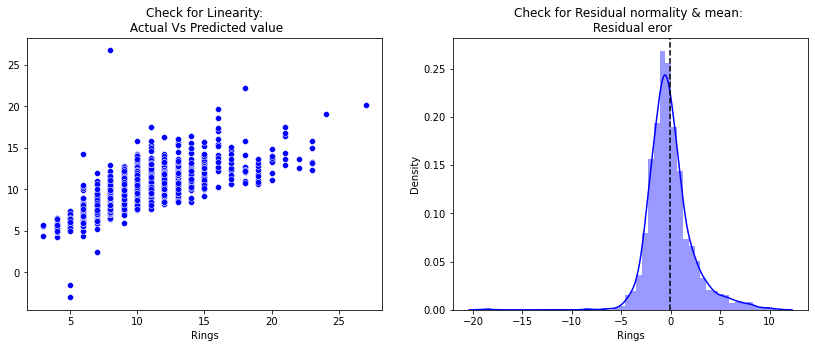

In [21]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='b')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

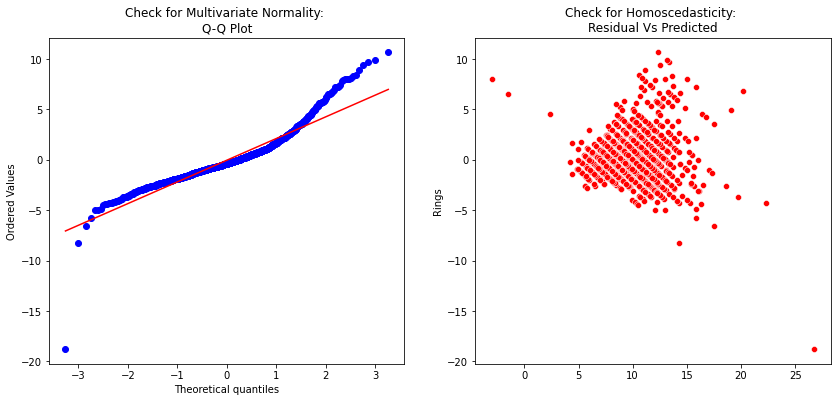

In [22]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [23]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

2.041905345381505